<div id="container" style="position:relative;">
<div style="position:relative; float:left"><img style="height:140px, width:280px" src ="images/covid_cover.png" />
</div>
</div>

**Combating Covid-19 Misinformation Using Natural Language Processing. How can we create a NLP Classification Model to detect whether an article, post, and tweet is in fact “real” or “fake”?**

**Please Note:** 
<br>

**This is notebook 2 of 6** - Each article and twitter dataset will have 3 notebooks each containing a 'Loading & Merging', 'Cleaning & EDA', and a 'Vectorizing and Modeling' notebook.

-------------------------------------------------------------------------------------------------------------------

# **Cleaning & EDA**

## **Data Dictionary**
<br>

- `type`(object)
- `fact_check_url`(object)
- `archive`(object)
- `news_url`(object)
- `news_url2`(object)
- `news_url3`(object)
- `news_url4`(object)
- `news_url5`(object)
- `title`(object)
- `newstitle`(object)
- `content`(object)
- `abstract`(object)
- `publish_date`(object)
- `meta_keywords`(object)
- `label`(object)


### URL Data
<br>

**Domain Names**
After cleaning and parsing throught the `news_url` feature; there are a total of 198 unique url's within the dataset. The top 10 urls are:
<br>

|**Domain Name**   |**Count**           
|:------------------|:--------------| 
| www.cdc.gov            |         1031| 
| www.healthline.com            |      586      |   
| www.facebook.com        | 536     |
| www.medicalnewstoday.com            | 463  | 
| www.sciencedaily.com            | 347  |      
| www.who.int            |         158 | 
| www.twitter.com             |      90     |   
| www.nih.gov        | 74    |
| www.youtube.com            | 44  | 
| www.newsroom.cleavelandclinic.org            | 44 |


Let's import all the packages needed for our cleaning and EDA notebook. I will include a Readme that will have the necessary packages for your enviroment.

In [4]:
# Importing everything we need
# The usual packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To make our sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Scalars
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# The classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import itertools

# Scoring
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Word Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
stopwords = set(STOPWORDS)
from PIL import Image

# Cell Width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# Tokenize Libraries
# Importing libraries
#import nltk import re
#from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## **Data Check**

In [5]:
CoAID_df = pd.read_csv('data/CoAID_df.csv')
CoAID_df

,Unnamed: 0,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords,label
0,0,post,https://factcheck.afp.com/false-advice-refusin...,https://perma.cc/J4N6-39D5,https://www.facebook.com/photo.php?fbid=551960...,0,0,0,0,Facebook posts shared in at least three countr...,0,0,0,0,0,fake
1,1,article,https://www.politifact.com/factchecks/2020/apr...,0,http://legis.wisconsin.gov/assembly/republican...,0,0,0,0,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,0,0,"""""",fake
2,2,post,https://factcheck.afp.com/posts-claim-children...,https://perma.cc/V4HX-M2XJ,https://www.facebook.com/iAmJessenia/photos/a....,0,0,0,0,Facebook posts claim a child who is infected w...,0,0,0,0,0,fake
3,3,post,https://checkyourfact.com/2020/04/20/fact-chec...,0,https://www.facebook.com/kokernagnews/photos/a...,0,0,0,0,IndiaÕs Ministry of Home Affairs banning citiz...,0,0,0,0,0,fake
4,5,post,https://checkyourfact.com/2020/04/20/fact-chec...,0,https://www.facebook.com/photo.php?fbid=102193...,0,0,0,0,"42 Democratic senators, plus two Independents,...",0,0,0,0,0,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,10078,article,https://www.politifact.com/factchecks/2020/oct...,0,https://www.themonitor.com/2020/10/05/kamala-h...,0,0,0,0,Says the “The Rio Grande Valley is 4.7% of the...,"""403 Forbidden""",0,0,0,"""""",real
5453,10079,article,https://www.politifact.com/factchecks/2020/oct...,0,https://www.wral.com/cooper-forest-engage-in-l...,0,0,0,0,"Georgia has “almost 100,000 more (COVID-19) ca...","""Cooper, Forest engage in lone gubernatorial d...",governor dan forest. live debate at u. n c. t ...,democratic gov. roy cooper and republican lt. ...,2020-10-14T18:47:00-04:00,"""Roy Cooper,Dan Forest,2020 governors race,deb...",real
5454,10080,post,https://www.politifact.com/factchecks/2020/oct...,0,https://www.facebook.com/photo.php?fbid=402154...,0,0,0,0,“Wisconsin Republicans have not passed a singl...,"""Facebook""",0,0,0,"""""",real
5455,10081,post,https://www.politifact.com/factchecks/2020/sep...,0,https://twitter.com/SenChrisLarson/status/1308...,0,0,0,0,“(Republicans) have the power to overturn the ...,"""""",this browser is no longer supported. please sw...,0,0,"""""",real


# **DATA CLEANING**
<br>

TODOs:
- Clean the missing values
- Remove Duplicates
- Set up the right data

Check the Data types that are contained within the dataframe

In [6]:
# Check the data types 
CoAID_df.dtypes

Unnamed: 0         int64
type              object
fact_check_url    object
archive           object
news_url          object
news_url2         object
news_url3         object
news_url4         object
news_url5         object
title             object
newstitle         object
content           object
abstract          object
publish_date      object
meta_keywords     object
label             object
dtype: object

## Duplicate Values

First we will check for duplicate rows:

In [7]:
# check for duplicate rows
duplicate_indicator = CoAID_df.duplicated()

In [8]:
# these rows have duplicates in the data
CoAID_df.loc[duplicate_indicator, :]

,Unnamed: 0,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords,label


There are no duplicates within the DataFrame - We can move on to the next step

## Missing Values

Next we will check the table for completeness and see if anyb data is missing. We present the per-columns fraction of missing values below:

In [9]:
#  Calculate the missing fraction using basic arithmatic
missing_fraction = CoAID_df.isna().sum()/CoAID_df.shape[0]*100
missing_fraction

Unnamed: 0        0.0
type              0.0
fact_check_url    0.0
archive           0.0
news_url          0.0
news_url2         0.0
news_url3         0.0
news_url4         0.0
news_url5         0.0
title             0.0
newstitle         0.0
content           0.0
abstract          0.0
publish_date      0.0
meta_keywords     0.0
label             0.0
dtype: float64

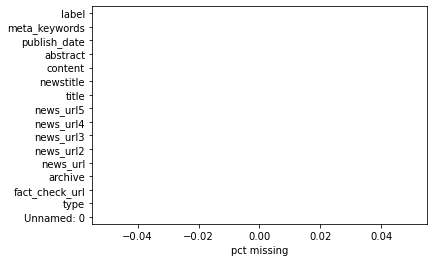

In [10]:
# plot the misssing values
missing_fraction.plot(kind="barh")# histogram
plt.xlabel("pct missing");# label missing categories

There are no missing values within the DataFrame - 
<br>
The Data Engineering Team is top quality and has provided us with a very clean data set - No cleaning will need to be done.
<br>
We can move on to the next step

The categorical columns can now be selected by the `object` type:

In [11]:
# Set up a new variable 
categoric_columns = list(CoAID_df.select_dtypes("object").columns)

In [12]:
# Sanity Check
categoric_columns

['type',
 'fact_check_url',
 'archive',
 'news_url',
 'news_url2',
 'news_url3',
 'news_url4',
 'news_url5',
 'title',
 'newstitle',
 'content',
 'abstract',
 'publish_date',
 'meta_keywords',
 'label']

## Clean Website URL's 
<br>

We will use a library to properly parse and clean the url's contained within the `news_url` column and create a new column named `domain` to concat into the original data frame


### `'news_url'`

In [13]:
# import parse library
from urllib.parse import urlparse
import urllib

# create new variable dataframe to append new values to
domain_df = pd.DataFrame()
urls = CoAID_df['news_url']  # tested with the column name
domain_df['protocol'], domain_df['domain'], domain_df['path'], domain_df['query'], domain_df['fragment'] = zip(
    *[urllib.parse.urlsplit(x) for x in urls]) # loop through the column name and rows to extract values

In [14]:
# Sanity Check
domain_df

,protocol,domain,path,query,fragment
0,https,www.facebook.com,/photo.php,fbid=551960552369167&set=a.112646526300574&type=3,
1,http,legis.wisconsin.gov,/assembly/republicans/news/wisconsin-legislatu...,,
2,https,www.facebook.com,/iAmJessenia/photos/a.10151658017176441/101567...,type=3,
3,https,www.facebook.com,/kokernagnews/photos/a.1070663659747172/218116...,type=3&theater,
4,https,www.facebook.com,/photo.php,fbid=10219317734188369&set=gm.642428883004151&...,
...,...,...,...,...,...
5452,https,www.themonitor.com,/2020/10/05/kamala-harris-husband-makes-campai...,,
5453,https,www.wral.com,/cooper-forest-engage-in-lone-gubernatorial-de...,,
5454,https,www.facebook.com,/photo.php,fbid=4021540444527755&set=a.432565453425290&ty...,
5455,https,twitter.com,/SenChrisLarson/status/1308783190186905603,,


In [15]:
# Print value counts
print(domain_df['domain'].value_counts())

www.webmd.com                 1709
www.cdc.gov                   1031
www.healthline.com             586
www.facebook.com               536
www.medicalnewstoday.com       463
                              ... 
healthfeedback.org               1
s3.us-east-2.amazonaws.com       1
www.the-scientist.com            1
themillenniumreport.com          1
www.motherjones.com              1
Name: domain, Length: 200, dtype: int64


Drop the columns in the domain_df that will no longer be useful for our classification problem

In [16]:
# drop columns
domain_df = domain_df.drop(['protocol', 'path', 'query', 'fragment'], axis=1)

In [17]:
# Sanity Check
domain_df

,domain
0,www.facebook.com
1,legis.wisconsin.gov
2,www.facebook.com
3,www.facebook.com
4,www.facebook.com
...,...
5452,www.themonitor.com
5453,www.wral.com
5454,www.facebook.com
5455,twitter.com


Add new column to the orignal CoAid dataframe

In [18]:
# Concatenate the dataframes
CoAID_df = pd.concat([CoAID_df, domain_df], axis=1)

In [19]:
# Sanity Check
CoAID_df

,Unnamed: 0,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords,label,domain
0,0,post,https://factcheck.afp.com/false-advice-refusin...,https://perma.cc/J4N6-39D5,https://www.facebook.com/photo.php?fbid=551960...,0,0,0,0,Facebook posts shared in at least three countr...,0,0,0,0,0,fake,www.facebook.com
1,1,article,https://www.politifact.com/factchecks/2020/apr...,0,http://legis.wisconsin.gov/assembly/republican...,0,0,0,0,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,0,0,"""""",fake,legis.wisconsin.gov
2,2,post,https://factcheck.afp.com/posts-claim-children...,https://perma.cc/V4HX-M2XJ,https://www.facebook.com/iAmJessenia/photos/a....,0,0,0,0,Facebook posts claim a child who is infected w...,0,0,0,0,0,fake,www.facebook.com
3,3,post,https://checkyourfact.com/2020/04/20/fact-chec...,0,https://www.facebook.com/kokernagnews/photos/a...,0,0,0,0,IndiaÕs Ministry of Home Affairs banning citiz...,0,0,0,0,0,fake,www.facebook.com
4,5,post,https://checkyourfact.com/2020/04/20/fact-chec...,0,https://www.facebook.com/photo.php?fbid=102193...,0,0,0,0,"42 Democratic senators, plus two Independents,...",0,0,0,0,0,fake,www.facebook.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,10078,article,https://www.politifact.com/factchecks/2020/oct...,0,https://www.themonitor.com/2020/10/05/kamala-h...,0,0,0,0,Says the “The Rio Grande Valley is 4.7% of the...,"""403 Forbidden""",0,0,0,"""""",real,www.themonitor.com
5453,10079,article,https://www.politifact.com/factchecks/2020/oct...,0,https://www.wral.com/cooper-forest-engage-in-l...,0,0,0,0,"Georgia has “almost 100,000 more (COVID-19) ca...","""Cooper, Forest engage in lone gubernatorial d...",governor dan forest. live debate at u. n c. t ...,democratic gov. roy cooper and republican lt. ...,2020-10-14T18:47:00-04:00,"""Roy Cooper,Dan Forest,2020 governors race,deb...",real,www.wral.com
5454,10080,post,https://www.politifact.com/factchecks/2020/oct...,0,https://www.facebook.com/photo.php?fbid=402154...,0,0,0,0,“Wisconsin Republicans have not passed a singl...,"""Facebook""",0,0,0,"""""",real,www.facebook.com
5455,10081,post,https://www.politifact.com/factchecks/2020/sep...,0,https://twitter.com/SenChrisLarson/status/1308...,0,0,0,0,“(Republicans) have the power to overturn the ...,"""""",this browser is no longer supported. please sw...,0,0,"""""",real,twitter.com


Drop columns that will no longer be valuable to us for our classification problem.

In [20]:
# Create a new variable called features\
# this will be used to drop columns 
columns = [
    'fact_check_url', 'archive', 'news_url2', 'news_url3',
    'news_url4', 'news_url5', 'abstract',
    'publish_date', 'meta_keywords'
]

In [21]:
# Drop the features from the dataframe
CoAID_df = CoAID_df.drop(columns, axis = 1)

In [22]:
# Sanity Check
CoAID_df.columns

Index(['Unnamed: 0', 'type', 'news_url', 'title', 'newstitle', 'content',
       'label', 'domain'],
      dtype='object')

Rearrange Column order for better viewing

In [23]:
# Name new columns
CoAID_df = CoAID_df[[
    'Unnamed: 0', 'type', 'news_url','domain', 'title', 'newstitle', 'content', 'label'
]]

In [24]:
# Sanity Check
CoAID_df

,Unnamed: 0,type,news_url,domain,title,newstitle,content,label
0,0,post,https://www.facebook.com/photo.php?fbid=551960...,www.facebook.com,Facebook posts shared in at least three countr...,0,0,fake
1,1,article,http://legis.wisconsin.gov/assembly/republican...,legis.wisconsin.gov,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,fake
2,2,post,https://www.facebook.com/iAmJessenia/photos/a....,www.facebook.com,Facebook posts claim a child who is infected w...,0,0,fake
3,3,post,https://www.facebook.com/kokernagnews/photos/a...,www.facebook.com,IndiaÕs Ministry of Home Affairs banning citiz...,0,0,fake
4,5,post,https://www.facebook.com/photo.php?fbid=102193...,www.facebook.com,"42 Democratic senators, plus two Independents,...",0,0,fake
...,...,...,...,...,...,...,...,...
5452,10078,article,https://www.themonitor.com/2020/10/05/kamala-h...,www.themonitor.com,Says the “The Rio Grande Valley is 4.7% of the...,"""403 Forbidden""",0,real
5453,10079,article,https://www.wral.com/cooper-forest-engage-in-l...,www.wral.com,"Georgia has “almost 100,000 more (COVID-19) ca...","""Cooper, Forest engage in lone gubernatorial d...",governor dan forest. live debate at u. n c. t ...,real
5454,10080,post,https://www.facebook.com/photo.php?fbid=402154...,www.facebook.com,“Wisconsin Republicans have not passed a singl...,"""Facebook""",0,real
5455,10081,post,https://twitter.com/SenChrisLarson/status/1308...,twitter.com,“(Republicans) have the power to overturn the ...,"""""",this browser is no longer supported. please sw...,real


In [25]:
# a little jupyter magic to see all active variables in the kernel
%whos

Variable                     Type         Data/Info
---------------------------------------------------
CoAID_df                     DataFrame          Unnamed: 0     type<...>\n[5457 rows x 8 columns]
CountVectorizer              type         <class 'sklearn.feature_e<...>on.text.CountVectorizer'>
Counter                      type         <class 'collections.Counter'>
DecisionTreeClassifier       ABCMeta      <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
GradientBoostingClassifier   ABCMeta      <class 'sklearn.ensemble.<...>dientBoostingClassifier'>
HTML                         type         <class 'IPython.core.display.HTML'>
Image                        module       <module 'PIL.Image' from <...>e-packages/PIL/Image.py'>
KNeighborsClassifier         ABCMeta      <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
LinearSVC                    type         <class 'sklearn.svm._classes.LinearSVC'>
LogisticRegression           type         <class 'sklearn.linear_mo<...>sti

# **EDA**
<br>

TODOs:
- plotting the categorical variables
- plotting the numeric variables
- Tokenize
- TF-IDF

The main goal is to understand 
<br>

1. the individual column distributions (histograms or box plots), and
2. how the columns may interact with the `label` field, and see if it can help us better classify real news from fake news.

Reminder: the main goal is to detect misinformation

## Categorical Unique Count Distributions

In [26]:
# Sanity Check
categoric_columns

['type',
 'fact_check_url',
 'archive',
 'news_url',
 'news_url2',
 'news_url3',
 'news_url4',
 'news_url5',
 'title',
 'newstitle',
 'content',
 'abstract',
 'publish_date',
 'meta_keywords',
 'label']

### `title` Category

In [27]:
# Set up new title variabel
CoAID_title = CoAID_df

In [28]:
# apply len column 
CoAID_title['title_length'] = CoAID_df['title'].apply(len)
CoAID_title.head()# Check

,Unnamed: 0,type,news_url,domain,title,newstitle,content,label,title_length
0,0,post,https://www.facebook.com/photo.php?fbid=551960...,www.facebook.com,Facebook posts shared in at least three countr...,0,0,fake,148
1,1,article,http://legis.wisconsin.gov/assembly/republican...,legis.wisconsin.gov,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,fake,60
2,2,post,https://www.facebook.com/iAmJessenia/photos/a....,www.facebook.com,Facebook posts claim a child who is infected w...,0,0,fake,114
3,3,post,https://www.facebook.com/kokernagnews/photos/a...,www.facebook.com,IndiaÕs Ministry of Home Affairs banning citiz...,0,0,fake,105
4,5,post,https://www.facebook.com/photo.php?fbid=102193...,www.facebook.com,"42 Democratic senators, plus two Independents,...",0,0,fake,151


Text(0.5, 1.0, 'Length of Title')

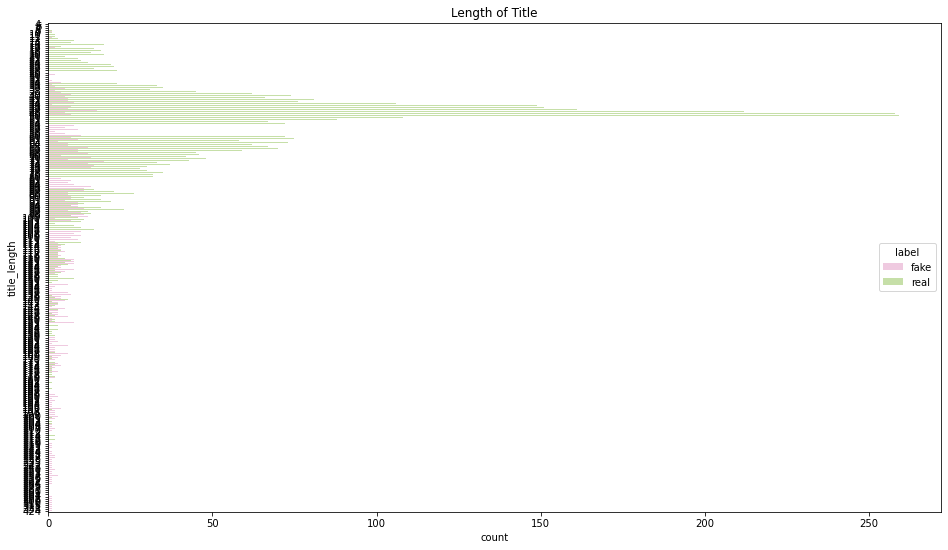

In [29]:
# set up 
plt.figure(figsize=(16,9))
# Plot variables and color palette          
sns.countplot(y='title_length', hue='label', data=CoAID_df, palette='PiYG')
# Dont forget the title        
plt.title("Length of Title")

In [30]:
# Check any interesting statistics
CoAID_title['title_length'].describe()

count    5457.000000
mean       66.547737
std        35.872896
min         4.000000
25%        47.000000
50%        56.000000
75%        76.000000
max       424.000000
Name: title_length, dtype: float64

Let's take a look at what is the longest title in the dataframe

In [31]:
# Retrieve the title with the longest word length
CoAID_title[CoAID_title['title_length'] == 424]['title'].iloc[0]

'The overall lethality of COVID-19 (infection fatality rate) is about 0.1% to 0.3% and thus in the range of a severe influenza; up to 60% of all persons may already have a certain cellular background immunity to the new coronavirus due to contact with previous coronaviruses (i.e. cold viruses); there is still little to no scientific evidence for the effectiveness of cloth face masks in healthy and asymptomatic individuals'

We will use a histogram to better visualize of the title lengths within each `label` classification. It will be interesting to see if title length has anything to do with an article being 'real' or 'fake'. 

array([<AxesSubplot:title={'center':'fake'}>,
       <AxesSubplot:title={'center':'real'}>], dtype=object)

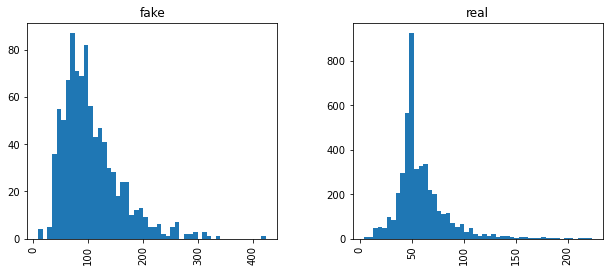

In [32]:
# plot the title length distribution
CoAID_title.hist(column='title_length',by ='label',bins=50,figsize = (10,4))

### `type` Category

In [33]:
# Set up type variable
CoAID_type = CoAID_df

Text(0.5, 1.0, 'Count of Type')

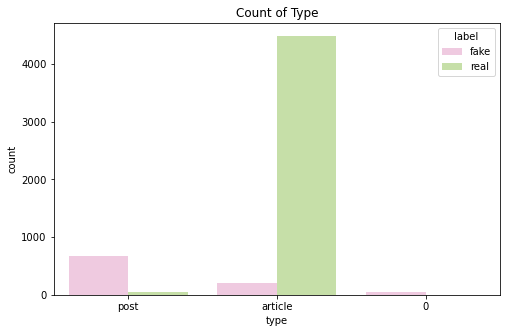

In [34]:
# set up plot
plt.figure(figsize=(8,5))
# plot type and label 'real' or 'fake'           
sns.countplot(x='type', hue='label', data=CoAID_df, palette='PiYG')
# Title   
plt.title("Count of Type")

### `domain` Category

In [35]:
# Set up domain variable
CoAID_domain = CoAID_df

In [36]:
# Sanity Check
CoAID_domain

,Unnamed: 0,type,news_url,domain,title,newstitle,content,label,title_length
0,0,post,https://www.facebook.com/photo.php?fbid=551960...,www.facebook.com,Facebook posts shared in at least three countr...,0,0,fake,148
1,1,article,http://legis.wisconsin.gov/assembly/republican...,legis.wisconsin.gov,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,fake,60
2,2,post,https://www.facebook.com/iAmJessenia/photos/a....,www.facebook.com,Facebook posts claim a child who is infected w...,0,0,fake,114
3,3,post,https://www.facebook.com/kokernagnews/photos/a...,www.facebook.com,IndiaÕs Ministry of Home Affairs banning citiz...,0,0,fake,105
4,5,post,https://www.facebook.com/photo.php?fbid=102193...,www.facebook.com,"42 Democratic senators, plus two Independents,...",0,0,fake,151
...,...,...,...,...,...,...,...,...,...
5452,10078,article,https://www.themonitor.com/2020/10/05/kamala-h...,www.themonitor.com,Says the “The Rio Grande Valley is 4.7% of the...,"""403 Forbidden""",0,real,136
5453,10079,article,https://www.wral.com/cooper-forest-engage-in-l...,www.wral.com,"Georgia has “almost 100,000 more (COVID-19) ca...","""Cooper, Forest engage in lone gubernatorial d...",governor dan forest. live debate at u. n c. t ...,real,140
5454,10080,post,https://www.facebook.com/photo.php?fbid=402154...,www.facebook.com,“Wisconsin Republicans have not passed a singl...,"""Facebook""",0,real,66
5455,10081,post,https://twitter.com/SenChrisLarson/status/1308...,twitter.com,“(Republicans) have the power to overturn the ...,"""""",this browser is no longer supported. please sw...,real,119


<AxesSubplot:xlabel='count', ylabel='domain'>

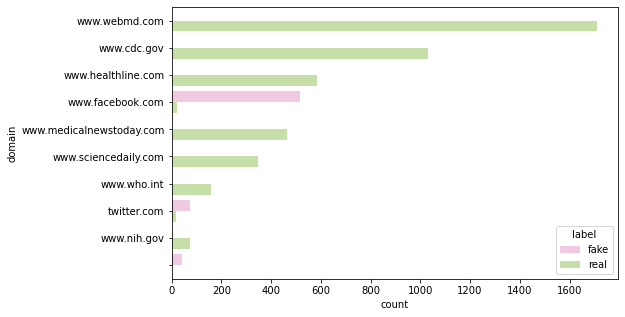

In [37]:
# domain variable
domains = CoAID_domain
#plot size
plt.figure(figsize=(8,5))
# Seaborn plot domain and label tag
sns.countplot(y="domain",hue='label', data=domains, palette='PiYG',
              order=domains.domain.value_counts().iloc[:10].index)# retrieve top 10 counts

### `label` Category

Text(0.5, 1.0, 'Count of Domains')

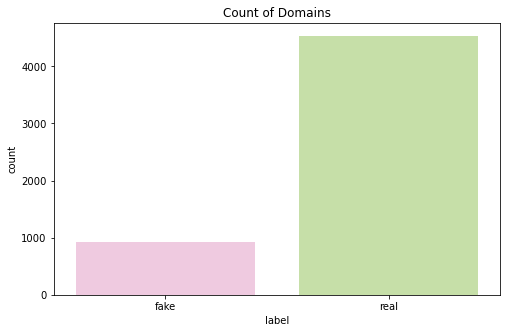

In [38]:
# set up figure size
plt.figure(figsize=(8,5))
# plot label counts for dataframe           
sns.countplot(x='label',data=CoAID_df, palette='PiYG')
# Title the plot           
plt.title("Count of Domains")

## Tokenizing

**Columns to Tokenize:** 
- `news_url`
- `title`
- `newstitle`
- `content`

In [39]:
def concat_all_sentences(sents):
    
    """
    Using this function will make sentences clean

    Arguments
    --------
    all_tokens:              is '' space

    loop through text:       

    parameters:             tx will lowercase all chars
                        replace : new lines, hashtags, punctuation, 
                        with : whitespace
                        join : 

    Usage
    -------
    concat_all_sentences(variable)


    """

    all_tokens = ''
    for text in sents:
        tx = str(text).lower().strip()
        tx = tx.replace('\n', ' ')
        tx = tx.replace('&amp', ' ')
        tx = tx.replace('#', '')
        tx = tx.replace('-', '')
        tx = tx.replace(';', '')
        tx = tx.replace('/', '')
        tx = " ".join(tx.split())
        all_tokens += tx + " "
    return all_tokens

### News "URL" Tokens

Combine all data frames for use later

In [40]:
# combine all news_urls
newsurl_combined = CoAID_df['domain']
newsurl_fake = CoAID_df[CoAID_df['label']=='fake']['domain']# combine fake urls
newsurl_real = CoAID_df[CoAID_df['label']=='real']['domain']# combine real urls

Clean up the sentences using the concat all sentences function we defined earlier.

In [41]:
# Concat all sentenes in urls
newsurl_tokens = concat_all_sentences(newsurl_combined)
newsurl_fake_tokens = concat_all_sentences(newsurl_fake)# concat all sentences in fake urls  
newsurl_real_tokens = concat_all_sentences(newsurl_real) # concat all sentences in real urls

### Article "Title" Tokens

In [42]:
# combine all titles
title_combined = CoAID_df['title']
title_fake = CoAID_df[CoAID_df['label']=='fake']['title']# combine all fake titles
title_real = CoAID_df[CoAID_df['label']=='real']['title']# combine all real titles

What does a fake title look like?

In [43]:
# Analyse fake title
title_real.head(100).values

array(['Coronavirus Outbreak: Live Updates',
       'Screen Time Doesn’t Hurt Kids’ Social Skills, Study Finds',
       'Here’s Exactly Where We Are with Vaccines and Treatments for COVID-19',
       'Here’s What Happens to the Body After Contracting the New Coronavirus',
       'Why You Should Be Skeptical of Early Results of COVID-19 Drug',
       'What Your Social Media Posts Say About Your Stress Level Right Now',
       'Rural America Could Be the Region Hardest Hit by the COVID-19 Outbreak',
       'Experts Warning: Don’t Use Off-Label Medications for COVID-19 Treatment',
       'Why Soaking Up the Sun to Treat COVID-19 Isn’t a Bright Idea',
       'What to Know About a Long Recovery Period After Surviving COVID-19',
       'Why Cooking Chicken to 165 Degrees Is Critical for Ensuring Safety, Preventing Illness',
       'Why COVID-19 is Hitting Men Harder Than Women',
       'What to Know About COVID-19 Testing Right Now',
       'Toddlers to Teens: How to Help Kids Cope with Stre

In [44]:
# Concat all sentenes in titles
title_tokens = concat_all_sentences(title_combined)
title_fake_tokens = concat_all_sentences(title_fake)# concat all sentences in fake titles 
title_real_tokens = concat_all_sentences(title_real)# concat all sentences in fake titles 

In [45]:
# Sanity Check
title_fake_tokens

'facebook posts shared in at least three countries as scientists work to develop a covid19 vaccine claim to offer a legal way to refuse vaccination. wisconsin is òclearly seeing a decline in covid infectionsó. facebook posts claim a child who is infected with the novel coronavirus will be taken to a hospital unaccompanied. indiaõs ministry of home affairs banning citizens from posting about the new coronavirus on social media. 42 democratic senators, plus two independents, voted against sending direct payments to americans as part of the coronavirus economic stimulus package. the photo of a vaccine for canine coronavirus proves that a vaccine exists for the novel coronavirus that causes covid19. a picture of a reporter in protective medical gear is an example of how the american media òhypesó the covid19 pandemic. a photo taken by a journalist showing a beach in jacksonville, florida, isnõt from after the government reopened the beach as news reports have claimed. news photo from staya

### Article "News Title" Tokens

Repeat for news titles

In [46]:
# combine all titles
newstitle_combined = CoAID_df['newstitle']
newstitle_fake = CoAID_df[CoAID_df['label']=='fake']['newstitle']# combine all fake titles
newstitle_real = CoAID_df[CoAID_df['label']=='real']['newstitle']# combine all real titles

In [47]:
# Concat all sentenes in titles
newstitle_tokens = concat_all_sentences(newstitle_combined)
newstitle_fake_tokens = concat_all_sentences(newstitle_fake) # concat all sentences in fake titles  
newstitle_real_tokens = concat_all_sentences(newstitle_real) # concat all sentences in real titles

### Article "Content" Tokens

Repeat for Content

In [48]:
# combine all content
content_combined = CoAID_df['content']
content_fake = CoAID_df[CoAID_df['label']=='fake']['content']# combine all fake content
content_real = CoAID_df[CoAID_df['label']=='real']['content']# combine all real content

In [49]:
# Concat all sentenes in content
content_tokens = concat_all_sentences(content_combined)
content_fake_tokens = concat_all_sentences(content_fake)# concat all sentences in fake content    
content_real_tokens = concat_all_sentences(content_real)# concat all sentences in real content 

#### Stop Words Custom Library

Set up a custom stopwords library to use along side english stopwords to remove words that appear in both fake and real dataframes so we can have a better understanding of what unique words appear most frequently in each dataframe

In [50]:
# Custom StopWords Library
stopwords = stopwords.union({
    'https', 'co', 'covid 19', 'coronavirus', 'covid', 'covid19', 'website',
    'people', '0', 'coronavirus.', '|', '|', 'access"', '"access', 'denied',
    '""', '&', '"covid19', '"log', 'coronavirus"', '"the', '"remarks',
    'forbidden"', '"403', '..."', 'covid19:', 'www.webmd.com', 'cloudflare',
    'used', 'restrict', '*coronavirus', '(covid19)', 'covid 19', '2019',
    'covid 19:', '(covid19)"', 'covid19"', '"covid19:', '"coronavirus', '_'
})

## Token Value Counts

### Domains / News Url

- Distributions of url's within the data set
- Url 'real' and 'fake' counts
- Compare url's

In [51]:
# apply stop works to dataframes all, real, and fake
domain_words = [w for w in newsurl_tokens.split() if w not in stopwords]
domain_fake_words = [w for w in newsurl_fake_tokens.split() if w not in stopwords]
domain_real_words = [w for w in newsurl_real_tokens.split() if w not in stopwords]

In [52]:
# obtain the top most frequently used token in the all, fake, and real dataframes
top_domain_words = Counter(domain_words).most_common(20)
top_domain_fake_words = Counter(domain_fake_words).most_common(20)
top_domain_real_words = Counter(domain_real_words).most_common(20)

In [53]:
# create a new dataframe to store top words
domain_words_list = pd.DataFrame({
    'Domain Words': top_domain_words,
    'Fake Domain Words': top_domain_fake_words,
    'Real Domaine Words': top_domain_real_words
})

In [54]:
# show dataframe with top words
domain_words_list

,Domain Words,Fake Domain Words,Real Domaine Words
0,"(www.cdc.gov, 1031)","(www.facebook.com, 516)","(www.cdc.gov, 1031)"
1,"(www.healthline.com, 586)","(twitter.com, 74)","(www.healthline.com, 586)"
2,"(www.facebook.com, 536)","(www.youtube.com, 37)","(www.medicalnewstoday.com, 463)"
3,"(www.medicalnewstoday.com, 463)","(youtu.be, 21)","(www.sciencedaily.com, 347)"
4,"(www.sciencedaily.com, 347)","(www.instagram.com, 21)","(www.who.int, 158)"
5,"(www.who.int, 158)","(www.whitehouse.gov, 7)","(www.nih.gov, 74)"
6,"(twitter.com, 90)","(www.rev.com, 6)","(newsroom.clevelandclinic.org, 40)"
7,"(www.nih.gov, 74)","(www.naturalnews.com, 4)","(newsnetwork.mayoclinic.org, 35)"
8,"(www.youtube.com, 44)","(n5ti.com, 4)","(www.facebook.com, 20)"
9,"(newsroom.clevelandclinic.org, 40)","(www.thegatewaypundit.com, 4)","(twitter.com, 16)"


Let's see how many unique `urls` (domain names/websites) we have in this dataset. This will give us a better understanding of how many features may come into play later down the line when we start feature engineering and optimizing our models.

In [93]:
# variable to hold the count
cnt = 0
  
# list to hold visited values
visited = []
  
# loop for counting the unique
# values in height
for i in range(0, len(domain_words)):
    
    if domain_words[i] not in visited: 
        
        visited.append(domain_words[i])
          
        cnt += 1
  
print("No.of.unique values :",
      cnt)
  
print("unique values :",
      visited)

No.of.unique values : 198
unique values : ['www.facebook.com', 'legis.wisconsin.gov', 'secondnexus.com', 'www.gilmorehealth.com', 'twitter.com', 'www.tiktok.com', 'youtu.be', 'www.theepochtimes.com', 'www.wivb.com', 'www.teaparty.org', 'www.thedailybeast.com', 'www.rev.com', 'video.foxnews.com', 'www.youtube.com', 'therepublicpost.wordpress.com', 'gellerreport.com', 'aviationdaily.news', 'pulpitandpen.org', 'www.americanthinker.com', 'www.wearethemighty.com', 'medium.com', 'www.weblyf.com', 'bustatroll.org', 'www.naturalnews.com', 'www.newyorkonenews.com', 'n5ti.com', 'mavenroundtable.io', 'drcarolehhaynes.com', 'wikitrusted.com', 'www.studentproblems.com', 'www.foxnews.com', 'mynacl.blogspot.com', 'www.whitehouse.gov', 'introtimes.com', 'smartairfilters.com', 'gossipblend.com', 'channel45news.com', 'www.nsemwoha.com', 'www.cbsnews.com', 'worldnewsdailyreport.com', 'www.globalresearch.ca', 'buffalochronicle.com', 'transcripts.cnn.com', 'ucrtv.com', 'hannity.com', 'beingtexan.com', 'opr

we have 198 unique `url's` within our dataset. 

In [55]:
domain_real_df = pd.DataFrame(Counter(domain_real_words).most_common(20))
domain_fake_df = pd.DataFrame(Counter(domain_fake_words).most_common(20))
domain_fake_df.columns = ['Word', 'Frequency']
domain_real_df.columns = ['Word', 'Frequency']

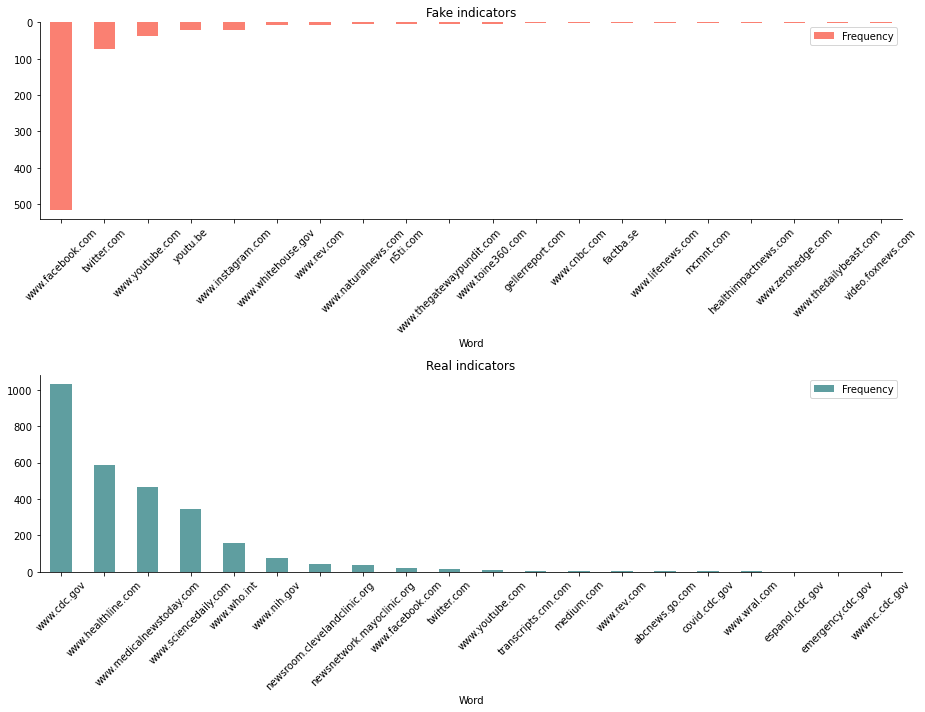

In [56]:
# set up the subplots
fig, axs = plt.subplots(2, 1, figsize=(13, 10))

# most frequent -> tokens indicating fake 
domain_fake_df.head(20).set_index("Word").plot(kind="bar",
                                              rot=45,
                                              ax=axs[0],
                                              color="salmon").invert_yaxis()
axs[0].set_title("Fake indicators")

# most frequent -> tokens indicating real
domain_real_df.head(20).set_index("Word").plot(kind="bar",
                                              rot=45,
                                              ax=axs[1],
                                              color="cadetblue")
# set the title
axs[1].set_title("Real indicators")
# layout for plot
sns.despine()
plt.tight_layout()
plt.show()

### Title 
Repeat process the same as above to determine word counts

In [57]:
# apply stop works to dataframes all, real, and fake
title_words = [w for w in title_tokens.split() if w not in stopwords]
title_fake_words = [w for w in title_fake_tokens.split() if w not in stopwords]
title_real_words = [w for w in title_real_tokens.split() if w not in stopwords]

In [58]:
# obtain the top most frequently used token in the all, fak, and real dataframes
top_title_words = Counter(title_words).most_common(20)
top_title_fake_words = Counter(title_fake_words).most_common(20)
top_title_real_words = Counter(title_real_words).most_common(20)

In [59]:
# create a new dataframe to store top words
title_words_list = pd.DataFrame({
    'Title Words': top_title_words,
    'Fake Title Words': top_title_fake_words,
    'Real Title Words': top_title_real_words
})

In [60]:
# show dataframe
title_words_list

,Title Words,Fake Title Words,Real Title Words
0,"(may, 262)","(says, 64)","(may, 245)"
1,"(new, 221)","(u.s., 59)","(new, 176)"
2,"(vaccine, 209)","(president, 58)","(pandemic, 175)"
3,"(pandemic, 208)","(trump, 55)","(vaccine, 164)"
4,"(health, 187)","(masks, 52)","(health, 162)"
5,"(u.s., 173)","(shows, 51)","(guidance, 123)"
6,"(cases, 137)","(will, 48)","(study, 122)"
7,"(testing, 134)","(vaccine, 45)","(risk, 119)"
8,"(study, 133)","(new, 45)","(patients, 119)"
9,"(patients, 132)","(video, 44)","(know, 114)"


In [61]:
title_real_df = pd.DataFrame(Counter(title_real_words).most_common(20))
title_fake_df = pd.DataFrame(Counter(title_fake_words).most_common(20))
title_fake_df.columns = ['Word', 'Frequency']
title_real_df.columns = ['Word', 'Frequency']

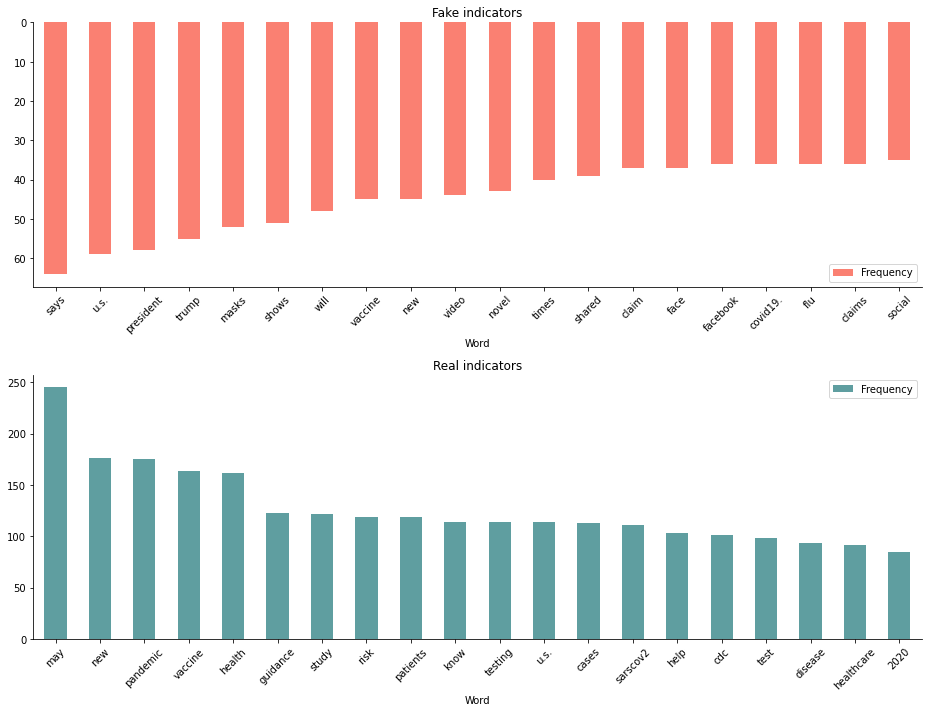

In [62]:
# set up plots
fig, axs = plt.subplots(2, 1, figsize=(13, 10))

# most frequent -> tokens indicating fake 
title_fake_df.head(20).set_index("Word").plot(kind="bar",
                                              rot=45,
                                              ax=axs[0],
                                              color="salmon").invert_yaxis()
axs[0].set_title("Fake indicators")

# most frequent -> tokens indicating real
title_real_df.head(20).set_index("Word").plot(kind="bar",
                                              rot=45,
                                              ax=axs[1],
                                              color="cadetblue")
#title plots
axs[1].set_title("Real indicators")
# plot layout
sns.despine()
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='count', ylabel='domain'>

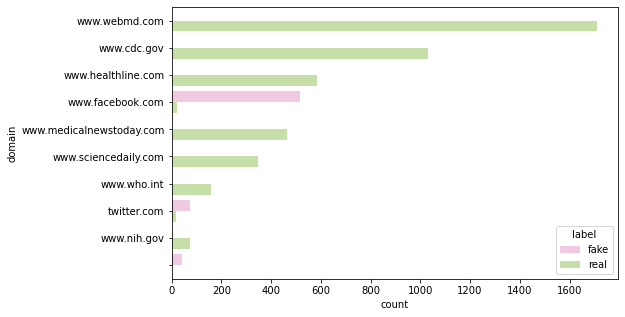

In [63]:
# plot top websites for real and fake
domains = CoAID_df
plt.figure(figsize=(8,5))
sns.countplot(y="domain",hue='label', data=domains, palette='PiYG',
              order=domains.domain.value_counts().iloc[:10].index)

Text(0.5, 1.0, 'Count of Title Tokens')

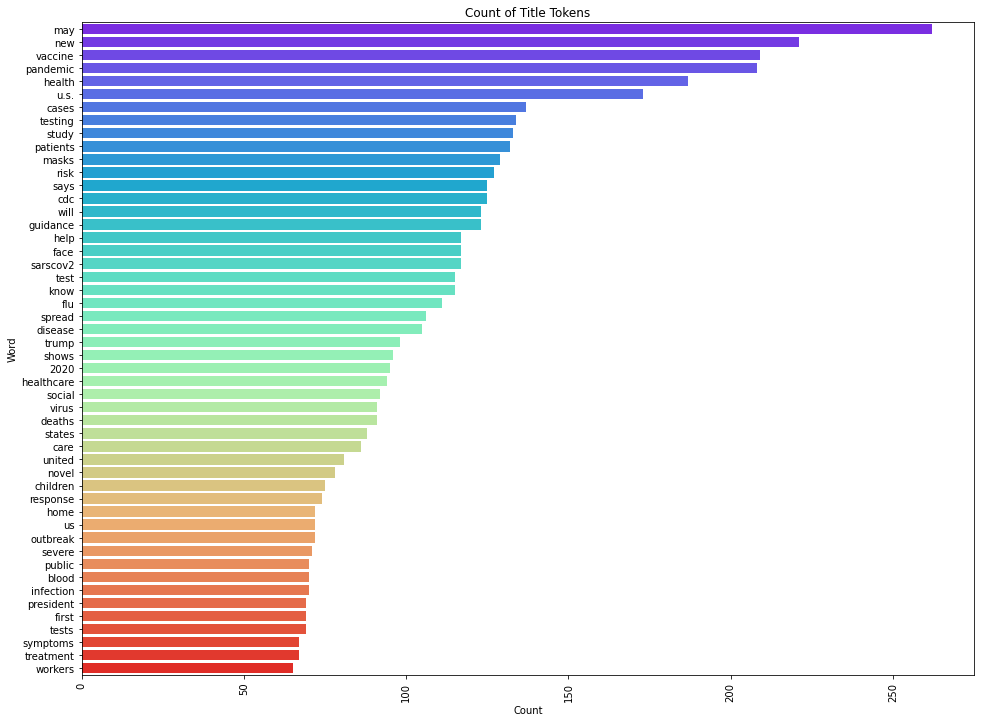

In [64]:
# DF for words
top_title_words_list = pd.DataFrame(Counter(title_words).most_common(50))
top_title_words_list.columns = ['Word', 'Count']

#
#sns.set(style="ticks", context="talk")

# Top Title Words
plt.figure(figsize=(16, 12))
sns.barplot(x="Count", y='Word', data=top_title_words_list, palette='rainbow')
plt.xticks(rotation=90)
plt.title("Count of Title Tokens")

### News Title
Repeat the above process for news titles

In [65]:
newstitle_words = [w for w in newstitle_tokens.split() if w not in stopwords]
newstitle_fake_words = [w for w in newstitle_fake_tokens.split() if w not in stopwords]
newstitle_real_words = [w for w in newstitle_real_tokens.split() if w not in stopwords]

In [66]:
top_newstitle_words = Counter(newstitle_words).most_common(20)
top_newstitle_words = Counter(newstitle_fake_words).most_common(20)
top_newstitle_words = Counter(newstitle_real_words).most_common(20)

In [67]:
newstitle_words_list = pd.DataFrame({
    'Title Words': top_newstitle_words,
    'Fake Title Words': top_newstitle_words,
    'Real Title Words': top_newstitle_words
})

In [68]:
newstitle_words_list

,Title Words,Fake Title Words,Real Title Words
0,"(disease, 592)","(disease, 592)","(disease, 592)"
1,"(events"", 192)","(events"", 192)","(events"", 192)"
2,"(""communities,, 191)","(""communities,, 191)","(""communities,, 191)"
3,"(schools,, 191)","(schools,, 191)","(schools,, 191)"
4,"(workplaces,, 191)","(workplaces,, 191)","(workplaces,, 191)"
5,"(may, 126)","(may, 126)","(may, 126)"
6,"(""how, 109)","(""how, 109)","(""how, 109)"
7,"(""what, 75)","(""what, 75)","(""what, 75)"
8,"(new, 71)","(new, 71)","(new, 71)"
9,"(health, 67)","(health, 67)","(health, 67)"


In [69]:
newstitle_real_df = pd.DataFrame(Counter(newstitle_real_words).most_common(20))
newstitle_fake_df = pd.DataFrame(Counter(newstitle_fake_words).most_common(20))
newstitle_fake_df.columns = ['Word', 'Frequency']
newstitle_real_df.columns = ['Word', 'Frequency']

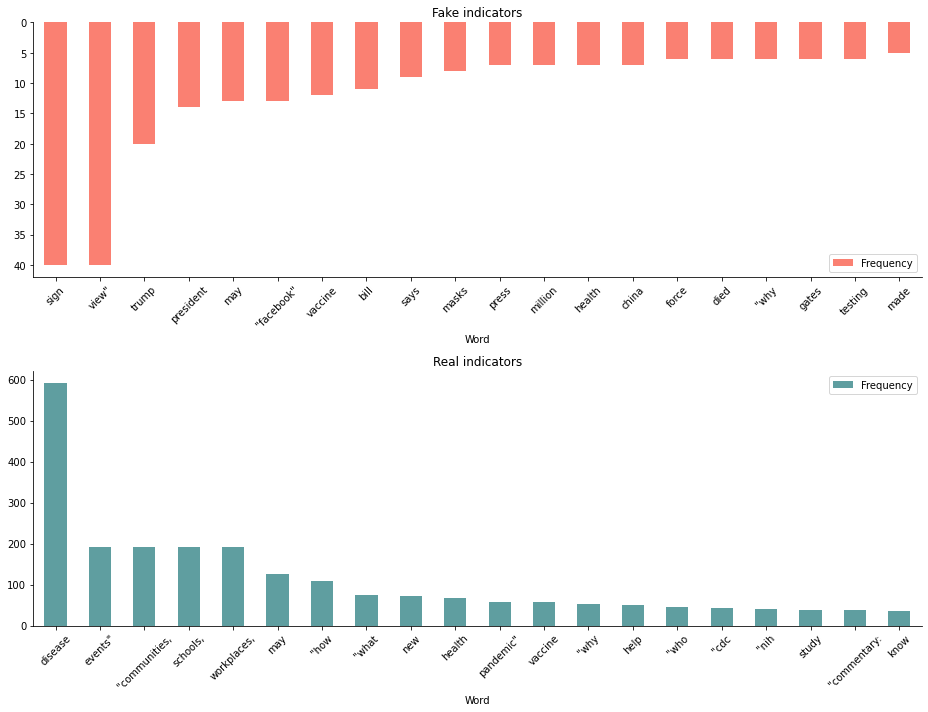

In [70]:
# set up plots
fig, axs = plt.subplots(2, 1, figsize=(13, 10))

# most frequent -> tokens indicating fake 
newstitle_fake_df.head(20).set_index("Word").plot(kind="bar",
                                                  rot=45,
                                                  ax=axs[0],
                                                  color="salmon").invert_yaxis()
axs[0].set_title("Fake indicators")

# most frequent -> tokens indicating real
newstitle_real_df.head(20).set_index("Word").plot(kind="bar",
                                                  rot=45,
                                                  ax=axs[1],
                                                  color="cadetblue")
# Title the plot
axs[1].set_title("Real indicators")
# plot layoout
sns.despine()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Count of News Title Tokens')

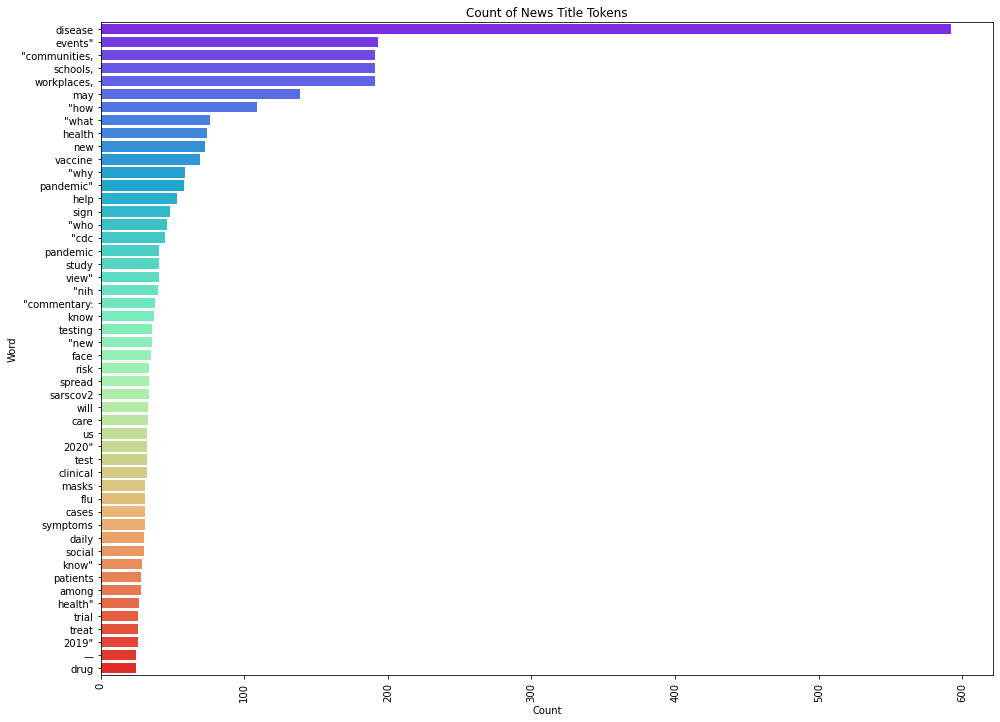

In [71]:
# DF for words
top_news_title_words_list = pd.DataFrame(
    Counter(newstitle_words).most_common(50))
top_news_title_words_list.columns = ['Word', 'Count']

# Top Title Words
plt.figure(figsize=(16, 12))
sns.barplot(x="Count", y='Word', data=top_news_title_words_list, palette='rainbow')
plt.xticks(rotation=90)
plt.title("Count of News Title Tokens")

### Content
Repea the process for the content

In [72]:
content_words = [w for w in content_tokens.split() if w not in stopwords]
content_fake_words = [w for w in content_fake_tokens.split() if w not in stopwords]
content_real_words = [w for w in content_real_tokens.split() if w not in stopwords]

In [73]:
top_content_words = Counter(content_words).most_common(20)
top_content_fake_words = Counter(content_fake_words).most_common(20)
top_content_real_words = Counter(content_real_words).most_common(20)

In [74]:
content_words_list = pd.DataFrame({
    'Title Words': top_content_words,
    'Fake Title Words': top_content_fake_words,
    'Real Title Words': top_content_real_words
})

In [75]:
content_words_list

,Title Words,Fake Title Words,Real Title Words
0,"(protect, 1267)","(see, 143)","(protect, 1258)"
1,"(health, 1215)","(facebook., 132)","(using, 1204)"
2,"(using, 1208)","(health, 51)","(online, 1197)"
3,"(online, 1199)","(new, 46)","(health, 1164)"
4,"(may, 1165)","(president, 43)","(service, 1140)"
5,"(.., 1147)","(virus, 40)","(may, 1136)"
6,"(service, 1142)","(want, 40)","(data, 1120)"
7,"(data, 1127)","(world, 35)","(.., 1113)"
8,"(security, 1105)","(.., 34)","(security, 1097)"
9,"(attacks, 1095)","(china, 34)","(attacks, 1094)"


In [76]:
content_real_df = pd.DataFrame(Counter(content_real_words).most_common(20))
content_fake_df = pd.DataFrame(Counter(content_fake_words).most_common(20))
content_fake_df.columns = ['Word', 'Frequency']
content_real_df.columns = ['Word', 'Frequency']

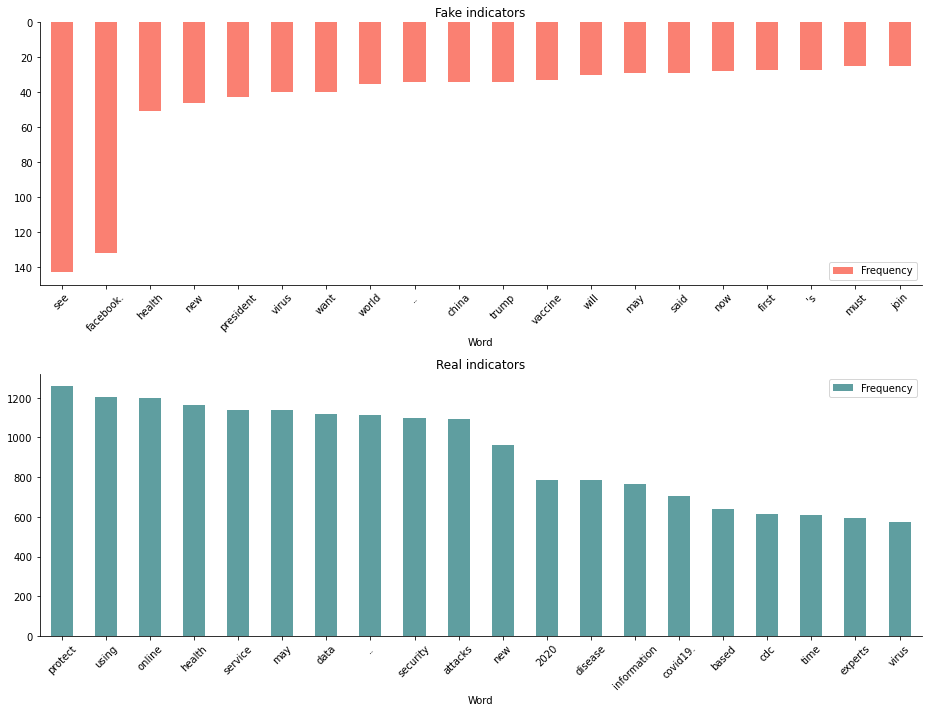

In [77]:
# set up plots
fig, axs = plt.subplots(2, 1, figsize=(13, 10))

# most frequent -> tokens indicating fake 
content_fake_df.head(20).set_index("Word").plot(kind="bar",
                                                rot=45,
                                                ax=axs[0],
                                                color="salmon").invert_yaxis()
axs[0].set_title("Fake indicators")

# most frequent -> tokens indicating real 
content_real_df.head(20).set_index("Word").plot(kind="bar",
                                                rot=45,
                                                ax=axs[1],
                                                color="cadetblue")
# title
axs[1].set_title("Real indicators")
# plot layouts
sns.despine()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Count of Content Tokens')

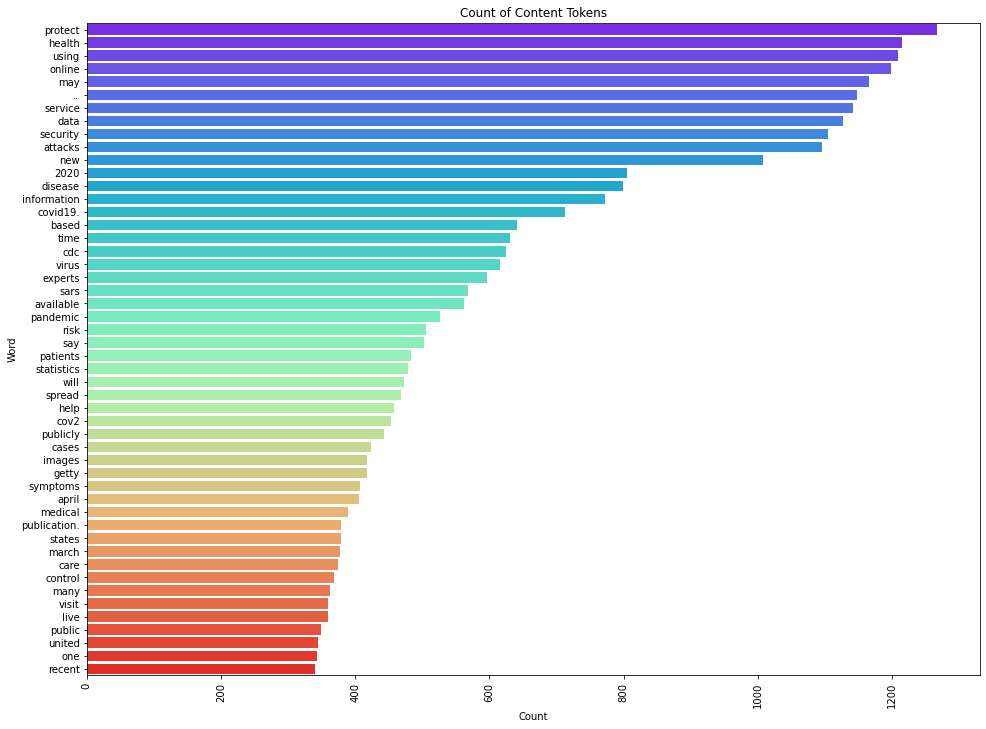

In [78]:
# DF for words
top_content_words_list = pd.DataFrame(Counter(content_words).most_common(50))
top_content_words_list.columns = ['Word', 'Count']

# Top Title Words
plt.figure(figsize=(16, 12))
sns.barplot(x="Count", y='Word', data=top_content_words_list, palette='rainbow')
plt.xticks(rotation=90)
plt.title("Count of Content Tokens")

## TF-IDF (Uni - Bi - Tri Grams)

Let's use term frequency inverse document frequency to find the tokens that have the most weight in determining whether an article is real or fake.

In [79]:
# Importing libraries
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
# the python string package has a helpful punctuation list
import string
print(string.punctuation)
stemmer = nltk.stem.PorterStemmer()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [80]:
# tokenizer is a function
# input: single document/sentence
# output: list of tokens

# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samuelgarcia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Uni Grams

In [81]:
titles = pd.DataFrame(CoAID_df['title'])
display(titles)

,title
0,Facebook posts shared in at least three countr...
1,Wisconsin is Òclearly seeing a decline in COVI...
2,Facebook posts claim a child who is infected w...
3,IndiaÕs Ministry of Home Affairs banning citiz...
4,"42 Democratic senators, plus two Independents,..."
...,...
5452,Says the “The Rio Grande Valley is 4.7% of the...
5453,"Georgia has “almost 100,000 more (COVID-19) ca..."
5454,“Wisconsin Republicans have not passed a singl...
5455,“(Republicans) have the power to overturn the ...


In [82]:
bagofwords = CountVectorizer().fit(titles["title"])
titles_transformed = bagofwords.transform(titles["title"])

titles_df = pd.DataFrame(columns=bagofwords.get_feature_names(), data=titles_transformed.toarray())
display(titles_df)

,000,02,03,03õ,054,06,10,100,10000,100000,...,ôcoronavirusõ,ôdemocrat,ôi,ôinfestationõ,ônewõ,ôresident,ôsamuel,ôvaccineõ,ôzyphr,õó
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5453,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
tfidf = TfidfVectorizer().fit(titles["title"])
titles_transformed = tfidf.transform(titles["title"])

titles_df = pd.DataFrame(columns=tfidf.get_feature_names(), data=titles_transformed.toarray())
display(titles_df)

,000,02,03,03õ,054,06,10,100,10000,100000,...,ôcoronavirusõ,ôdemocrat,ôi,ôinfestationõ,ônewõ,ôresident,ôsamuel,ôvaccineõ,ôzyphr,õó
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5453,0.168352,0.0,0.0,0.0,0.0,0.0,0.0,0.197086,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5454,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5455,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The `sklearn` implementation uses a more complex IDF count, so we will not get into the math of these numbers, but it is very customizable so feel free to look at the documentation.

Notice that while for the `CountVectorizer` the word "absolutely" got a value of 1 for all three documents, the `TfidfVectorizer` gave it a higher value for a short review (it makes up a bigger part of that sentence).

Also notice that while for the `CountVectorizer`, the value for the word "period" is 1, the same value as for the words "movie", "beaten", and "have", the `TfidfVectorizer` gave it the highest value since it only appears in one document.

Now, looking at our reviews data:

In [84]:
# store simplified data in X and y
X = CoAID_df['title']
y = CoAID_df['label']

In [85]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
X_train

518     The new coronavirus contains HIV ÒinsertionsÓ ...
4412    Interim Operational Considerations for Impleme...
32      Video shows an orangutan who started washing i...
3488    Discontinuation of Isolation for Persons with ...
4303    How CDC Determines the Level of a Country’s CO...
                              ...                        
3772    What a Lack of COVID-19 Testing Means for Chil...
5191       Back-to-School Means Changes in Teaching Plans
5226                         Can COVID-19 Cause Diabetes?
5390    Monitoring and Evaluation Checklist for K-12 S...
860     We can’t make a vaccine that works for flu, no...
Name: title, Length: 3656, dtype: object

In [87]:
# using our custom tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5,
                        tokenizer=my_tokenizer)
tfidf.fit(X_train)

X_train_transformed = tfidf.transform(X_train)
X_test_transformed = tfidf.transform(X_test)

X_train_transformed.shape

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3656, 1000)

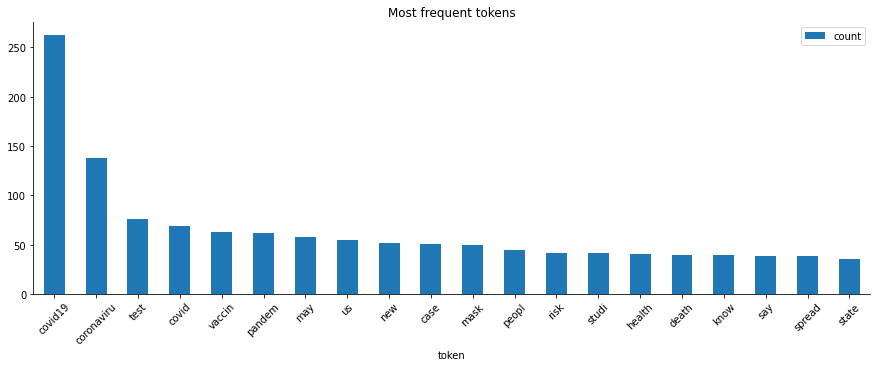

In [88]:
def plot_most_frequent(words, word_counts, top=20):
    words_df = pd.DataFrame({"token": words, 
                             "count": word_counts})
    
    fig, ax = plt.subplots(figsize=(0.75*top, 5))
    words_df.sort_values(by="count", ascending=False).head(top)\
        .set_index("token")\
        .plot(kind="bar", rot=45, ax=ax)
    sns.despine()
    plt.title("Most frequent tokens")
    plt.show()
    
    
words = tfidf.get_feature_names()
word_weights = X_train_transformed.toarray().sum(axis=0)

plot_most_frequent(words, word_weights)

### Bi Grams

In [89]:
# set up bigrams dataframe
Bi_titles_df = pd.DataFrame(CoAID_df['title'])

In [90]:
# Preprocessing
def remove_string_special_characters(s):

    # removes special characters with ' '
    stripped = re.sub('[^a-zA-z\s]', '', s)
    stripped = re.sub('_', '', stripped)

    # Change any white space to one space
    stripped = re.sub('\s+', ' ', stripped)

    # Remove start and end white spaces
    stripped = stripped.strip()
    if stripped != '':
        return stripped.lower()
    
# Stopword removal
stop_words = nltk.corpus.stopwords.words('english')
#stop_words.extend(newStopWords)
for i, line in enumerate(Bi_titles_df['title']):
    Bi_titles_df['title'][i] = ' '.join([
        x for x in nltk.word_tokenize(line)
        if (x not in stop_words)
    ])
    
# Get the bigrams 
vectorizer = CountVectorizer(ngram_range =(2, 2))
X1 = vectorizer.fit_transform(Bi_titles_df['title']) 
features = (vectorizer.get_feature_names())
print("\n\nX1 : \n", X1.toarray())
  
# Applying TFIDF
# You can still get n-grams here using the ngram range
vectorizer = TfidfVectorizer(ngram_range = (2, 2))
X2 = vectorizer.fit_transform(Bi_titles_df['title'])
scores = (X2.toarray())
print("\n\nScores : \n", scores)
  
# Get the top ranking features
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0, col] ))
ranking = pd.DataFrame(data1, columns = ['term', 'rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords : \n", words.head(20))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/samuelgarcia/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


### Tri Grams

In [ ]:
Tri_titles_df = pd.DataFrame(CoAID_df['title'])

In [ ]:
Tri_titles_df

In [ ]:
# Preprocessing
def remove_string_special_characters(s):

    # removes special characters with ' '
    stripped = re.sub('[^a-zA-z\s]', '', s)
    stripped = re.sub('_', '', stripped)

    # Change any white space to one space
    stripped = re.sub('\s+', ' ', stripped)

    # Remove start and end white spaces
    stripped = stripped.strip()
    if stripped != '':
        return stripped.lower()
    
# Stopword removal
stop_words = nltk.corpus.stopwords.words('english')

for i, line in enumerate(Tri_titles_df['title']):
    Tri_titles_df['title'][i] = ' '.join([
        x for x in nltk.word_tokenize(line)
        if (x not in stop_words)
    ])
    
# Getting bigrams 
vectorizer = CountVectorizer(ngram_range =(3, 3))
X1 = vectorizer.fit_transform(Tri_titles_df['title']) 
features = (vectorizer.get_feature_names())
print("\n\nX1 : \n", X1.toarray())
  
# Applying TFIDF
# You can still get n-grams here
vectorizer = TfidfVectorizer(ngram_range = (3, 3))
X2 = vectorizer.fit_transform(Tri_titles_df['title'])
scores = (X2.toarray())
print("\n\nScores : \n", scores)
  
# Getting top ranking features
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0, col] ))
ranking = pd.DataFrame(data1, columns = ['term', 'rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords : \n", words.head(20))

## Topic Modeling
<br>

Topic modeling or topic clustering is another example applied to text - think of how Google News clusters articles into sport, business, international, politics, etc. A common method is to use Latent Dirchlet Allocation (LDA, not to be confused with Linear Discriminant Analysis, which is also abbreviated as LDA), which is a type of unsupervised learning. We could also use Non-negative Matrix Factorization (NMF).

Both methods are available in sklearn and are demonstrated here.

Using what we learned about text processing, we can quickly run an example of LDA on the newsgroup dataset which contains emails from 20 categories.

In [ ]:
# parts of the example are from here
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

print(f"Number of documents: {len(CoAID_df.title)}")

print(f"\nSample document:\n\n {CoAID_df.title[42]}")

First, we vectorize our documents with TF-IDF.

In [ ]:
#NLTK has a few prebuilt stopwords lists
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
# We can add in additional words to include further stopwords
# We've added these to remove some email-specific words 
#stopwords.extend(['edu','com','cc','gov'])

# TF-IDF vectorization
tfidf = TfidfVectorizer(min_df=5,
                        max_df=0.95, # drop words that occur in at least 95% of the documents
                        max_features=1000, 
                        stop_words=stopwords)

title_transformed = tfidf.fit_transform(CoAID_df.title)

title_transformed.shape

Next, we fit the **Latent Dirichlet Allocation** model to discover related sets of documents. We will set the `n_components` parameter to 10 so that the model looks for 10 topics and limit the fitting procedure to 5 iterations.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# fit the LDA topic model
lda = LatentDirichletAllocation(n_components=10, 
                                max_iter=5,
                                random_state=0
                               )
lda.fit(title_transformed)

Finally, we can look at which words represent the 10 topics best (these are the words that occurred most frequently for the particular topic).

In [ ]:
# for each topic, print the the top 10 most representative words
words = tfidf.get_feature_names()

for i, topic in enumerate(lda.components_):
    topic_words = " ".join([words[j] for j in topic.argsort()[: -11: -1]])
    print(f"Topic #{i} words: {topic_words}")

Review original topics for future feature engineering

# Cleaning & EDA Conclusion

## What’s the Conclusion from the EDA on Text Data?
<br>

Let’s take a look at the inferences drawn from the above analysis:

- WOrds like says and said appear most commonly in fake news
- Fake news titles are shorter in length
- Fake news uses much simpler terms and sentences
- Uni Grams will be the best indicator/features to use for modeling


In [ ]:
***********************************************************************
# Save new dataframe to csv file
#CoAID_df.to_csv (('CoAID_Article_df.csv'), index = False, header=True)
***********************************************************************

# End of Part 2 of 6: Please Refer to Part 3 of 6